## Stage to Discharge

#### This module will take the final, corrected stage data from the previous module and convert it to Discharge

In [1]:
#### Import Python modules
## this determines if plots are static or interactive (inline for static pictures)
%matplotlib notebook 
## Data Processing
import os
import numpy as np
import pandas as pd
#import math
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
## Set Pandas display options
pd.set_option('display.large_repr', 'truncate')
pd.set_option('display.width', 180)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 10)
#pd.set_option('display.precision', 3)

#timer
import datetime as dt
now = dt.datetime.now()
print 'Start time: '+now.strftime('%H:%M:%S')
now_date = now.strftime('%d_%m_%Y')

Start time: 14:49:12


In [2]:
#### DIRECTORIES
Laptop = 'Alex' ## you can use the presets below

if Laptop == 'Field': 
    maindir = "C:/Users/geoguser/Desktop/FieldLaptop/AmSamFieldLaptop/Siumu's Folder/"
    dirs={'main':maindir}
    
if Laptop == 'Alex': 
    maindir = "C:/Users/atm19/Documents/Github/Fagaalu_monitoring/Fagaalu_Monitoring_2016/"
    dirs={'main':maindir}
    
if Laptop == 'Trent': 
    maindir = "C:/Users/atm19/Google Drive/AmSamFieldLaptop/Siumu's Folder/" # <<<< TRENT ADD YOUR PATH HERE
    dirs={'main':maindir}

In [3]:
## Year Interval Times 
start2016, stop2016 = dt.datetime(2016,1,1,0,0), dt.datetime(2016,6,1,11,59)   

## Calculate Q at LBJ
### This block calcuates Q from Manning's equation for each cm of stage


In [14]:
## if this already exists as a csv, just open the csv and get Q, indexed by stage
try:
    print 'from csv'
    ### Import final/corrected stage data from csv's (created in Module 1)
    LBJ_stage = pd.DataFrame.from_csv(maindir+'3-LBJ/LBJ-PT-Stage-final.csv') ## FINAL/CORRECTED STAGE DATA (already imported above, this line is for the raw code development)
    ### Get rid of the stage correction column, it gets in the way of doing .dropna() later on
    del LBJ_stage['zshift_cm']
    ## Straight from csv
    LBJ_Man_reduced = pd.DataFrame.from_csv(maindir+'3-LBJ/LBJ_Man_reduced.csv')

## if it doesn't exist, create it; if you need a new one (new range of stages), delete the csv and run it
except:
    print 'make new'
    ## Import final/corrected stage data from csv's (created in Module 1)
    #LBJ_stage = pd.DataFrame.from_csv(maindir+'3-LBJ/LBJ-PT-Stage-final.csv') ## FINAL/CORRECTED STAGE DATA (already imported above, this line is for the raw code development)
    ## Get rid of the stage correction column, it gets in the way of doing .dropna() later on
    del LBJ_stage['zshift_cm']
    ## Calculate discharge from Manning's equation, for each cm of stage
    from Mannings_from_stage import Mannings_Q_from_stage_data ## This is a separate piece of code, stored as a python script in the same folder as this notebook
    ## Set the Mannings parameters for the LBJ
    LBJ_S, LBJ_n, LBJ_k = 0.016, .067, 1
    ## Create a dataframe of only the stage values that are recorded
    LBJ_stage_reduced = LBJ_stage['stage_cm'].dropna().round(0).drop_duplicates().order()
    ## Calculate discharge with Mannings on the reduced range of values
    LBJ_Man_reduced = Mannings_Q_from_stage_data(maindir+'3-LBJ/LBJ_cross_section.xlsx','LBJ_m',Slope=LBJ_S,Manning_n=LBJ_n,k=LBJ_k, stage_data=LBJ_stage_reduced)
    ## Save the output to csv
    LBJ_Man_reduced.to_csv(maindir+'3-LBJ/LBJ_Man_reduced.csv')



from csv


#### Double check stage data is correctly read in (from the csv file)

In [15]:
LBJ_stage.dropna().head()


,"Abs Pres, kPa","Temp, C",index,Baropress,Pressure_compensated,raw_stage_cm,corrected_stage_cm,stage_cm
2016-02-05 13:20:00,101.135981,30.6,2016-02-05 13:20:00,100.650,0.485981,5.0,5.0,5.0
2016-02-05 13:25:00,101.116368,30.4,2016-02-05 13:25:00,100.635,0.481368,4.9,4.9,4.9
2016-02-05 13:30:00,101.106561,30.2,2016-02-05 13:30:00,100.631,0.475561,4.9,4.9,4.9
2016-02-05 13:35:00,101.106561,30.1,2016-02-05 13:35:00,100.626,0.480561,4.9,4.9,4.9
2016-02-05 13:40:00,101.086948,30.0,2016-02-05 13:40:00,100.616,0.470948,4.8,4.8,4.8


#### Visualize the output of the Manning's calculation
##### Stage-Discharge rating curve:

<IPython.core.display.Javascript object>


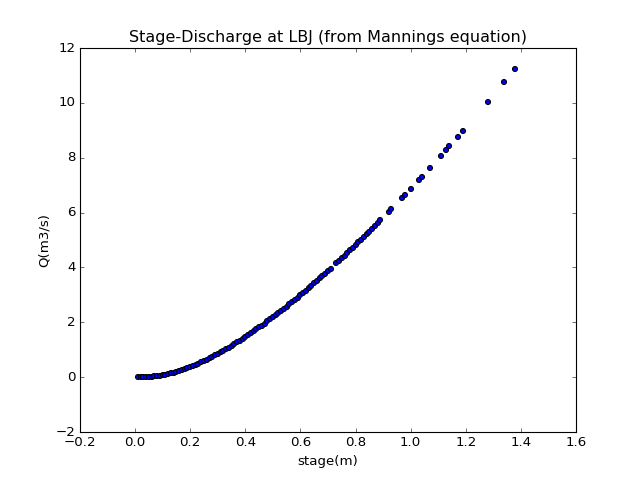

(<matplotlib.text.Text at 0x10d32470>,
 <matplotlib.text.Text at 0x1197c7f0>)

In [16]:
## Visualize Stage-Q Rating
plt.scatter(LBJ_Man_reduced['stage(m)'], LBJ_Man_reduced['Q(m3/s)'])
plt.ylabel('Q(m3/s)'), plt.xlabel('stage(m)'), plt.title('Stage-Discharge at LBJ (from Mannings equation)')

### Convert stage timeseries to Q with rating curve

In [19]:
## Add column of stage in m to match up with rating curve (LBJ_Man_reduced)
#LBJ_stage['corrected_stage_cm'] = LBJ_stage['corrected_stage_cm'] + 5. ## add 5cm so no zero/negative values???? Not sure what this is from, maybe offset with the AV measurements
LBJ_stage['stage_m'] = LBJ_stage['corrected_stage_cm'].round(0)/100.

## Add empty column for Discharge
LBJ_stage['Q(m3/s)'] = np.nan

LBJ_stage.dropna(how='all').head()

,"Abs Pres, kPa","Temp, C",index,Baropress,Pressure_compensated,raw_stage_cm,corrected_stage_cm,stage_cm,stage_m,Q(m3/s)
2016-02-05 13:20:00,101.135981,30.6,2016-02-05 13:20:00,100.650,0.485981,5.0,5.0,5.0,0.05,NaN
2016-02-05 13:25:00,101.116368,30.4,2016-02-05 13:25:00,100.635,0.481368,4.9,4.9,4.9,0.05,NaN
2016-02-05 13:30:00,101.106561,30.2,2016-02-05 13:30:00,100.631,0.475561,4.9,4.9,4.9,0.05,NaN
2016-02-05 13:35:00,101.106561,30.1,2016-02-05 13:35:00,100.626,0.480561,4.9,4.9,4.9,0.05,NaN
2016-02-05 13:40:00,101.086948,30.0,2016-02-05 13:40:00,100.616,0.470948,4.8,4.8,4.8,0.05,NaN


In [23]:
## Match discharge to stage records for whole time series
## This saves you from re-calculating Mannings for each stage value, just do it once for each cm of stage!
## Iterate over stage records and add discharge value from the reduced stage record for which Manning's Q was calculated
for row in LBJ_stage.dropna(how='all').iterrows():
    stage = row[1]['stage_m']
    try:
        Q = LBJ_Man_reduced[LBJ_Man_reduced['stage(m)']==stage]['Q(m3/s)'].iloc[0]
        LBJ_stage.loc[row[0],'Q(m3/s)'] = Q
    except:
        print "Can't get Q data from LBJ_Man_reduced"+ str(row[0])+str(stage)
    

In [25]:
LBJ_stage.dropna(how='all').head()


,"Abs Pres, kPa","Temp, C",index,Baropress,Pressure_compensated,raw_stage_cm,corrected_stage_cm,stage_cm,stage_m,Q(m3/s)
2016-02-05 13:20:00,101.135981,30.6,2016-02-05 13:20:00,100.650,0.485981,5.0,5.0,5.0,0.05,0.017
2016-02-05 13:25:00,101.116368,30.4,2016-02-05 13:25:00,100.635,0.481368,4.9,4.9,4.9,0.05,0.017
2016-02-05 13:30:00,101.106561,30.2,2016-02-05 13:30:00,100.631,0.475561,4.9,4.9,4.9,0.05,0.017
2016-02-05 13:35:00,101.106561,30.1,2016-02-05 13:35:00,100.626,0.480561,4.9,4.9,4.9,0.05,0.017
2016-02-05 13:40:00,101.086948,30.0,2016-02-05 13:40:00,100.616,0.470948,4.8,4.8,4.8,0.05,0.017


### Visualize the Q timeseries

<IPython.core.display.Javascript object>


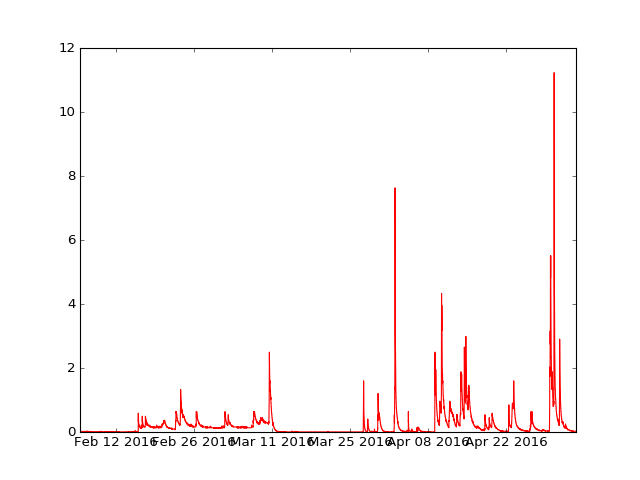

In [26]:
## Visualize Q timeseries
fig, Q = plt.subplots(1,1)
Q.plot_date(LBJ_stage.index, LBJ_stage['Q(m3/s)'],marker='None',ls='-',c='r')

### If good, save as a Q timeseries for later

In [27]:
## Pass stage data on to discharge df
LBJ_Q = LBJ_stage
## ADD a L/sec
LBJ_Q['Q(L/s)'] = LBJ_Q['Q(m3/s)'] * 1000
## Save the Q timeseries output to csv
LBJ_Q.to_csv(maindir+'3-LBJ/LBJ_Q.csv')

## Calculate Q at FOREST

In [28]:
## FOREST
FOREST_stage = pd.DataFrame.from_csv(maindir+'1-FOREST/FOREST-PT-Stage-final.csv')

### HEC-RAS Model of the DAM structure: Documents/HEC/FagaaluDam.prj
def HEC_piecewise(PTdata):
    if type(PTdata)!=pd.Series:
        PTdata = pd.Series(data=PTdata)
    HEC_a1, HEC_b1 = 9.9132, -5.7184 ## from excel DAM_HEC.xlsx
    HEC_a2, HEC_b2 = 25.823, -171.15 
    HEC_a3, HEC_b3 = 98.546, -3469.4
    
    Func1=PTdata[PTdata<=11]*HEC_a1 + HEC_b1
    Func2=PTdata[(PTdata>11)&(PTdata<=45)]*HEC_a2 + HEC_b2
    Func3=PTdata[PTdata>45]*HEC_a3 + HEC_b3
    AllValues = Func1.append([Func2,Func3])
    return AllValues
    
FOREST_HEC = pd.DataFrame(data=range(0,150),columns=['stage(cm)'])
FOREST_HEC['Q_HEC(L/sec)'] = HEC_piecewise(FOREST_HEC['stage(cm)'])

FOREST_HEC['Q_HEC(L/sec)']= HEC_piecewise(FOREST_HEC['stage(cm)']).values

FOREST_HEC_rating = pd.ols(y=FOREST_HEC['Q_HEC(L/sec)'],x=FOREST_HEC['stage(cm)'],intercept=True) 

FOREST_stage['Q(L/s)'] = HEC_piecewise(FOREST_stage['stage_cm'])

FOREST_Q = FOREST_stage

FOREST_Q.to_csv(maindir+'1-FOREST/FOREST-Q-HEC.csv')


## Plot discharge time series together

<IPython.core.display.Javascript object>


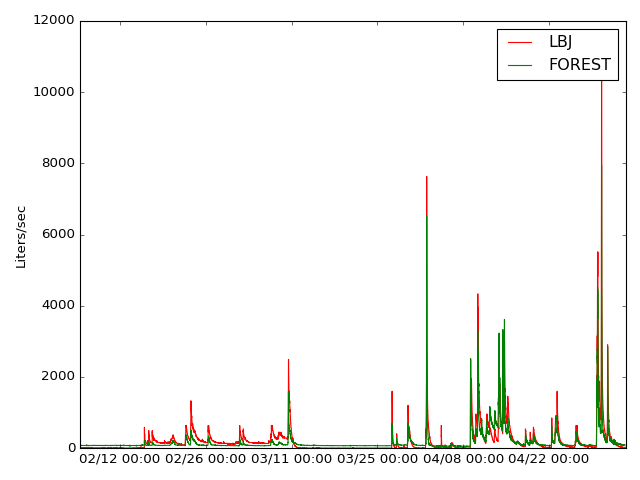

In [32]:
fig, Q = plt.subplots(1,1)

Q.plot_date(LBJ_Q.index, LBJ_Q['Q(L/s)'],marker='None',ls='-',c='r',label='LBJ')
Q.plot_date(FOREST_Q.index, FOREST_Q['Q(L/s)'],marker='None',ls='-',c='g',label='FOREST')
Q.set_ylabel('Liters/sec')
plt.legend()
Q.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m/%d %H:%M'))
plt.tight_layout()
plt.show()